# 1. Question or problem definition.

In my work, I will use datasets from Kaggle. First of all, let's go to the competition named Digit Recognizer. In this competition, we can find the definition of a task (or problem).

@goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.@

That is the main problem of titanic competition.

So let's start with it.

Load packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acquire data
Load datasets from competition

In [10]:
test = pd.read_csv ('test.csv')

In [11]:
train = pd.read_csv('train.csv')

# Analyze by describing data

We know that all data represented by numerical data
Since the main goal is to make a prediction model, which will predict the label (what is the number represented by pixels). 

Let's see a distribution of labels in training datasets. 

In [12]:
labeled_group = train.groupby('label')

total_observation = len(train['label'])
for label in range(0,10):
    print('Relative frequency of {} = {:.3f} %'.format(label,labeled_group['label'].get_group(label).count()/total_observation*100))

Relative frequency of 0 = 9.838 %
Relative frequency of 1 = 11.152 %
Relative frequency of 2 = 9.945 %
Relative frequency of 3 = 10.360 %
Relative frequency of 4 = 9.695 %
Relative frequency of 5 = 9.036 %
Relative frequency of 6 = 9.850 %
Relative frequency of 7 = 10.479 %
Relative frequency of 8 = 9.674 %
Relative frequency of 9 = 9.971 %


As we can see the numbers in training data represented in almost equal parts. 


# Prediction, model, result

In [13]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

That is good in our datasets we don't have any missing or NA values, which helps us to skip the Data mining part of the project.

### First of all, I divide the train data and test data, into features and prediction variables. In the main goal, I want to predict the label by the pixels, that is why I execute the label from train data and set it to y (prediction). In the test data, we don't have the label variable we have only pixels. 

In [14]:
from sklearn.model_selection import train_test_split

X = train.drop(['label'], axis = 1)
y = train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


In this project I can use the classification method as SVM and K-nearest neighbors, I will use k-nearest neighbors. I will write circle to take best n - neighbors. 

k 1 completed
k 2 completed
k 3 completed
k 4 completed
k 5 completed
k 6 completed


Text(0, 0.5, 'Testing accuracy')

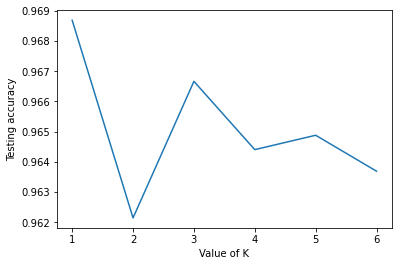

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1,7)
scores = []

# We are going to use differnt values of K as choose the best one as per accuracy_score
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    print('k {} completed'.format(k))
    

# Plotting testing accuracy
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')

Based on graps the better case then N = 1, second one is 3, and this is 5. 

In [15]:
# More efficient way is to process the data in samll batches.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Model training on entire train data
# final prediction for test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
y_pred = knn.predict(test)

In [17]:
# save submission to csv
pd.DataFrame({"ImageId": list(range(1,len(test)+1)),"Label": y_pred}).to_csv('Digit_recogniser.csv', index=False,header=True)

The final Final accuracy = 0.96803, that happened because I work with low size datasets, if we want to have acc ~ 1, need to train on the whole (~74 000) data. 